<a href="https://colab.research.google.com/github/kulyash22/Project-Track/blob/master/TVS_KYC_IDENTIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image


Best angle: -1


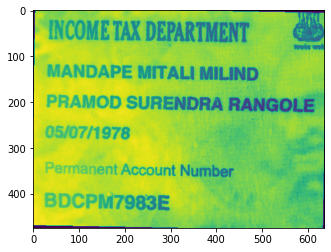

In [ ]:
import cv2
import numpy as np
import tempfile
from matplotlib import pyplot as plt

import sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
from scipy.ndimage import interpolation as inter
input_file = sys.argv[1]
img = im.open('/content/PAM7.jpg')
wd, ht = img.size
plt.savefig('binary.png')
def find_score(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score
delta = 1
limit = 5
angles = np.arange(-limit, limit+delta, delta)
scores = []
for angle in angles:
    hist, score = find_score(img, angle)
    scores.append(score)
best_score = max(scores)
best_angle = angles[scores.index(best_score)]
print('Best angle: {}'.format(best_angle))
# correct skew
data = inter.rotate(img, best_angle, reshape=False, order=0)
img = im.fromarray((data).astype("uint8"))
img.save('skew_corrected.png')
img1 = cv2.imread('/content/skew_corrected.png',0)

plt.imshow(img1) 
#img1 = cv2.medianBlur(img1,5)

INCOMETAX DEPARTMENT

'ANDAPE MITALI MILIND
viOD SURENDRA RANGOLE
978 : .
Account Number

vi7983E
 INCOME TAX DEPARTMENT

MANDAPE MITALI MILIND
RAMOD SURENDRA RANGOLE
7/1978 “.
Account Number a
Pe

PM7983E
 INCOME TAX DEPARTMENT ©

ANDAPE MITALI MILIND
OD SURENDRA RANGOLE
978
Account Number
Vi7983E
 INCOMETAX DEPARTMENT

'ANDAPE MITALI MILIND
viOD SURENDRA RANGOLE
978 : .
Account Number

vi7983E
 INCOME TAX DEPARTMENT

ae
MANDAPE MITALI MILIND

= AMOD SURENDRA RANGOLE

7/1978 : ‘ om :

nt Account Number

PM7983E

 
 INCOME TAX DEPARTMENT

ae
MANDAPE MITALI MILIND

= AMOD SURENDRA RANGOLE

7/1978 : ‘ om :

nt Account Number

PM7983E

 



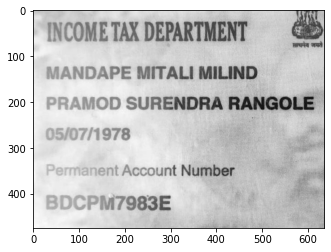

In [ ]:
#image_path_in_colab="/content/IMG_20201227_105130.jpg"
extractedInformation1 = pytesseract.image_to_string(img1)
img2 = cv2.imread('/content/PAM7.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3 = cv2.medianBlur(img1,3)
img4 = cv2.medianBlur(img2,3)
extractedInformation3 = pytesseract.image_to_string(img3)
extractedInformation2 = pytesseract.image_to_string(img4)
img5 = cv2.medianBlur(img1,1) 
img6 = cv2.medianBlur(img2,1)
extractedInformation4 = pytesseract.image_to_string(img5)
extractedInformation5 = pytesseract.image_to_string(img6)
extractedInformation6 = pytesseract.image_to_string(img2)
plt.imshow(img2,'gray') 


extractedInformation  = str(extractedInformation1 + " " + extractedInformation2 + " " + extractedInformation3 + " " + extractedInformation4 + " " + extractedInformation5 + " " + extractedInformation6)
print(extractedInformation)

In [ ]:
n=len(extractedInformation)
print(n)
vote=0
startvo=-1
for i in range(n-10):
  c=0;
  for j in range(10):
    if j<=2 and extractedInformation[i+j]>='A' and extractedInformation[i+j]<='Z':
      c+=1
    elif j>2 and extractedInformation[i+j]>='0' and extractedInformation[i+j]<='9':
      c+=1
  if i>0 and (extractedInformation[i-1]==' ' or extractedInformation[i-1]=='\n'):
    c+=1
  elif i==0:
    c+=1
  if i+10<n and extractedInformation[i+10]==' ' or extractedInformation[i+10]=='\n':
    c+=1
  elif i==n-10:
    c+=1
  if c==12:
    vote=1
    startvo=i
    break
if vote==1:
  print(extractedInformation[startvo:startvo+10])
  print("This is a voter id card")
else:
  print("This is not a voter id card")

print('\n')

pan=0
startpan=-1
for i in range(n-10):
  c=0;
  for j in range(10):
    if j<=4 and extractedInformation[i+j]>='A' and extractedInformation[i+j]<='Z':
      c+=1
    elif j==9 and extractedInformation[i+j]>='A' and extractedInformation[i+j]<='Z':
      c+=1
    elif j>4 and j<9 and extractedInformation[i+j]>='0' and extractedInformation[i+j]<='9':
      c+=1
  if i>0 and (extractedInformation[i-1]==' ' or extractedInformation[i-1]=='\n'):
    c+=1
  elif i==0:
    c+=1
  if i+10<n and extractedInformation[i+10]==' ' or extractedInformation[i+10]=='\n':
    c+=1
  elif i==n-10:
    c+=1
  if c==12:
    pan=1
    startpan=i
    break
if pan==1:
  print(extractedInformation[startpan:startpan+10])
  print("This is a PAN card")
else:
  print("This is not a PAN CARD")

print('\n')

aadhaar=0
startaa=-1
for i in range(n-14):
  c=0;
  for j in range(14):
    if j==4 and extractedInformation[i+j]>=' ':
      c+=1
    elif j==9 and extractedInformation[i+j]>=' ':
      c+=1
    elif j!=4 and j!=9 and extractedInformation[i+j]>='0' and extractedInformation[i+j]<='9':
      c+=1
  if i>0 and (extractedInformation[i-1]==' ' or extractedInformation[i-1]=='\n'):
    c+=1
  elif i==0:
    c+=1
  if i+14<n and extractedInformation[i+14]==' ' or extractedInformation[i+14]=='\n':
    c+=1
  elif i==n-14:
    c+=1
  if c==16:
    aadhaar=1
    startaa=i
    break
if aadhaar==1:
  print(extractedInformation[startaa:startaa+14])
  print("This is an aadhaar card")
else:
  print("This is not a aadhaar CARD")

print('\n')

passport=0
startpa=-1
for i in range(n-8):
  c=0;
  for j in range(8):
    if j==0 and extractedInformation[i+j]>='A' and extractedInformation[i+j]<='Z':
      c+=1
    elif j>0 and extractedInformation[i+j]>='0' and extractedInformation[i+j]<='9':
      c+=1
  if i>0 and (extractedInformation[i-1]==' ' or extractedInformation[i-1]=='\n'):
    c+=1
  elif i==0:
    c+=1
  if i+8<n and extractedInformation[i+8]==' ' or extractedInformation[i+8]=='\n':
    c+=1
  elif i==n-8:
    c+=1
  if c==10:
    passport=1
    startpa=i
    break
if passport==1:
  print(extractedInformation[startpa:startpa+8])
  print("This is a passport card")
else:
  print("This is not a passport card")

print('\n')

licence=0
startli=-1
for i in range(n-16):
  c=0;
  for j in range(16):
    if j<=1 and extractedInformation[i+j]>='A' and extractedInformation[i+j]<='Z':
      c+=1
    elif j==4 and extractedInformation[i+j]==' ':
      c+=1
    elif j!=4 and j>1 and extractedInformation[i+j]>='0' and extractedInformation[i+j]<='9':
      c+=1
  if i>0 and (extractedInformation[i-1]==' ' or extractedInformation[i-1]=='\n'):
    c+=1
  elif i==0:
    c+=1
  if i+16<n and extractedInformation[i+16]==' ' or extractedInformation[i+16]=='\n':
    c+=1
  elif i==n-16:
    c+=1
  if c==18:
    licence=1
    startli=i
    break
if licence==1:
  print(extractedInformation[startli:startli+16])
  print("This is a driving licence")
else:
  print("This is not a driving licence")
print('\n')

nrega=0
startnr=-1
for i in range(n-21):
  c=0;
  for j in range(21):
    if j<=1 and extractedInformation[i+j]>='A' and extractedInformation[i+j]<='Z':
      c+=1
    elif j==2 and extractedInformation[i+j]=='-':
      c+=1
    elif j==5 and extractedInformation[i+j]=='-':
      c+=1
    elif j==9 and extractedInformation[i+j]=='-':
      c+=1
    elif j==13 and extractedInformation[i+j]=='-':
      c+=1
    elif j==17 and extractedInformation[i+j]=='/':
      c+=1
    elif j>2 and j!=5 and j!=9 and j!=13 and j!=17 and extractedInformation[i+j]>='0' and extractedInformation[i+j]<='9':
      c+=1
  if extractedInformation[i-1]==' ' or extractedInformation[i-1]=='\n':
    c+=1
  elif i==0:
    c+=1
  if i+21<n and extractedInformation[i+21]==' ' or extractedInformation[i+21]=='\n':
    c+=1
  elif i==n-21:
    c+=1
  if c==23:
    nrega=1
    startnr=i
    break
if nrega==1:
  print(extractedInformation[startnr:startnr+21])
  print("This is a nrega card")
else:
  print("This is not a nrega card")

84
This is not a voter id card


BDCPM7983E
This is a PAN card


This is not a aadhaar CARD


This is not a passport card


This is not a driving licence


This is not a nrega card
